In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the Dataset
df = pd.read_csv("/content/Titanic-Dataset.csv", encoding='ISO-8859-1')

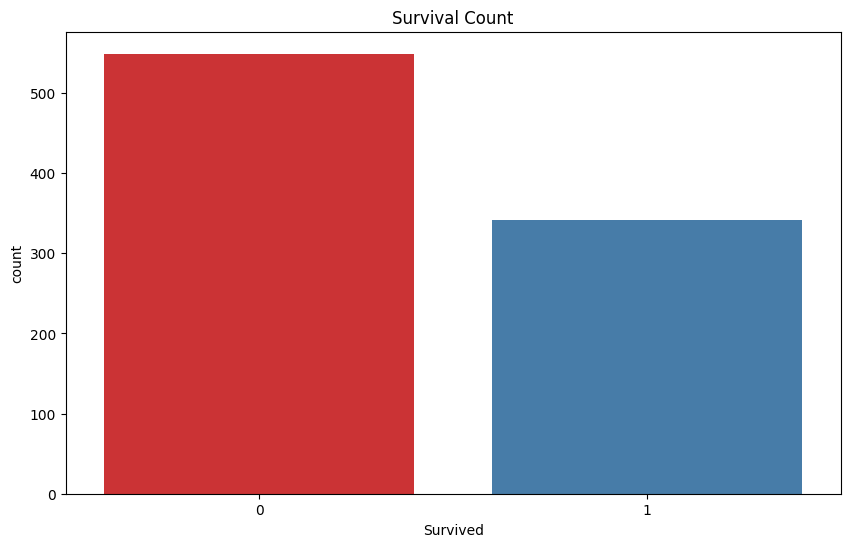

In [3]:
# Visual Analysis - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Count')
plt.show()

In [4]:
# Feature Selection and Preprocessing
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df.dropna(inplace=True)
X = pd.get_dummies(df[features], columns=['Sex'], drop_first=True)
y = df['Survived']

In [5]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Build and Train the Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
# Make Predictions
predictions = model.predict(X_test_scaled)

In [9]:
# Evaluate the Model
accuracy = accuracy_score(y_test, predictions)

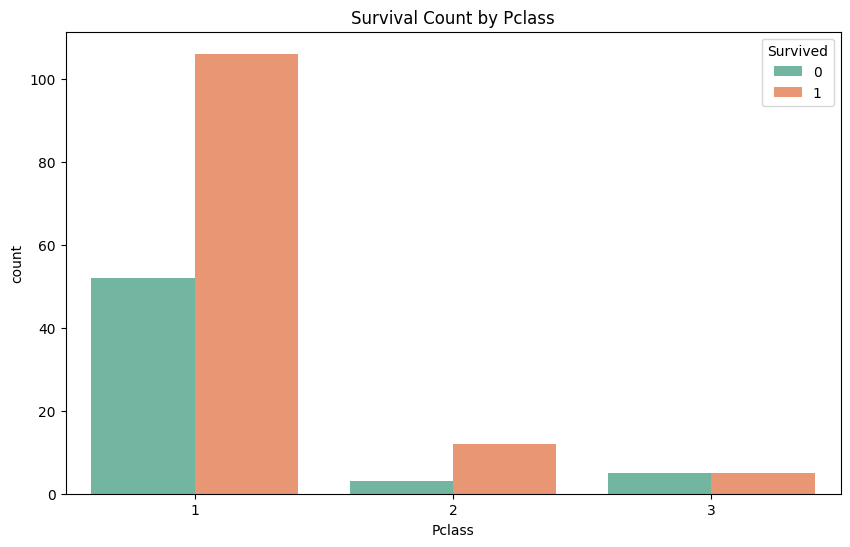

In [10]:
# Visual Analysis - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Pclass')
plt.show()


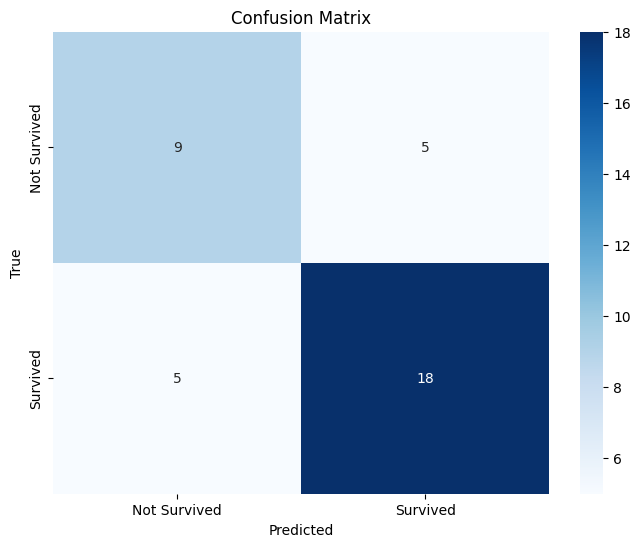

In [11]:
# Display Confusion Matrix as a Heatmap
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Display Classification Report
class_report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7297297297297297
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.78      0.78      0.78        23

    accuracy                           0.73        37
   macro avg       0.71      0.71      0.71        37
weighted avg       0.73      0.73      0.73        37



The accuracy and a detailed classification report are printed to summarize the model's effectiveness.